In [1]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical


In [4]:
path1 ="D:/Sezin/Pelin/OCT2017/train"
path2 ="D:/Sezin/Pelin/OCT2017/test"
path3 ="D:/Sezin/Pelin/OCT2017/val"
test_ratio=0.2
val_ratio=0.2
image_size=(128,128)

In [5]:
myList = os.listdir(path1)
print("Total Number of Classes Detected :",len(myList))

Total Number of Classes Detected : 4


In [6]:
noOfclasses= len(myList)

print(myList)
print("Importing Classes...")

['CNV', 'DME', 'DRUSEN', 'NORMAL']
Importing Classes...


In [7]:
images=[]
classNo=[]
CATEGORIES = ["CNV","DME","DRUSEN",'NORMAL']
for x in myList:
  myPicList = os.listdir(path1+"/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path1+"/"+str(x)+"/"+y)
    ad= cv2.threshold(curImg,240,255,cv2.THRESH_BINARY)[1]
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    image = cv2.morphologyEx (ad,cv2.MORPH_CLOSE, kernel)
    image[image==0]=1
    image[image==255]=0
    curImg=image*curImg
    curImg = cv2.resize(curImg,(128,128))
    curImg = cv2.cvtColor(curImg,cv2.COLOR_BGR2GRAY)
    images.append(curImg)
    classNo.append(CATEGORIES.index(x))

  print(x,end=" ")

CNV DME DRUSEN NORMAL 

In [8]:
x_test=[]
y_test=[]
CATEGORIES = ["CNV","DME","DRUSEN",'NORMAL']
for x in myList:
  myPicList = os.listdir(path2+"/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path2+"/"+str(x)+"/"+y)
    ad= cv2.threshold(curImg,240,255,cv2.THRESH_BINARY)[1]
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    image = cv2.morphologyEx (ad,cv2.MORPH_CLOSE, kernel)
    image[image==0]=1
    image[image==255]=0
    curImg=image*curImg
    curImg = cv2.resize(curImg,(128,128))
    curImg = cv2.cvtColor(curImg,cv2.COLOR_BGR2GRAY)
    x_test.append(curImg)
    y_test.append(CATEGORIES.index(x))
  print(x,end=" ")

CNV DME DRUSEN NORMAL 

In [9]:
x_val=[]
y_val=[]
CATEGORIES = ['NORMAL',"CNV","DME","DRUSEN"]
for x in myList:
  myPicList = os.listdir(path3+"/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path3+"/"+str(x)+"/"+y)
    ad= cv2.threshold(curImg,240,255,cv2.THRESH_BINARY)[1]
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    image = cv2.morphologyEx (ad,cv2.MORPH_CLOSE, kernel)
    image[image==0]=1
    image[image==255]=0
    curImg=image*curImg
    curImg = cv2.resize(curImg,(128,128))
    curImg = cv2.cvtColor(curImg,cv2.COLOR_BGR2GRAY)
    x_val.append(curImg)
    y_val.append(CATEGORIES.index(x))
  print(x,end=" ")

CNV DME DRUSEN NORMAL 

In [10]:
print(len(images))
print(len(classNo))

83484
83484


In [11]:
x_train = np.array(images)
y_train = np.array(classNo)

In [12]:
x_test = np.array(x_test)
y_test = np.array(y_test)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(83484, 128, 128)
(968, 128, 128)
(32, 128, 128)


In [14]:
del images
del classNo

In [15]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
print(x_train.shape)

(83484, 128, 128, 1)


In [16]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
print(x_test.shape)

(968, 128, 128, 1)


In [17]:
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],x_val.shape[2],1)
print(x_val.shape)

(32, 128, 128, 1)


In [18]:
print(y_test.shape)
print(y_train.shape)
print(y_val.shape)

(968,)
(83484,)
(32,)


In [19]:
y_trainy = to_categorical(y_train,noOfclasses)
y_testy = to_categorical(y_test,noOfclasses)
y_valy = to_categorical(y_val,noOfclasses)

In [20]:
print(y_testy.shape)
print(y_trainy.shape)
print(y_valy.shape)

(968, 4)
(83484, 4)
(32, 4)


In [21]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(83484, 128, 128, 1)
(968, 128, 128, 1)
(32, 128, 128, 1)


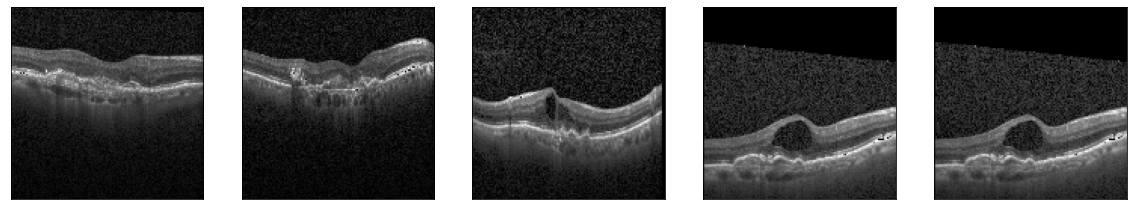

In [22]:
n = 5
plt.figure(figsize= (20,20))
for i in range(n) :
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_train[i].reshape(128,128))
  plt.gray()
  ax.get_xaxis().set_visible (False)
  ax.get_yaxis().set_visible (False)
plt.show()

In [23]:
def preProcessing(img):
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize =((3,3)))
    cl = clahe.apply(img)
    arka_plan = cv2.medianBlur(cl,37)
    maske = cv2.addWeighted(cl,0.8,arka_plan,-1,255)
    img =cv2.bitwise_and(maske,cl)
    img = cv2.GaussianBlur(img,(5,5),0)
    return img

In [24]:
x_testy = np.array(list(map(preProcessing,x_test)))

In [25]:
x_trainy = np.array(list(map(preProcessing,x_train)))

In [26]:
#n = 5
#plt.figure(figsize= (20,20))
#for i in range(n) :
 # ax = plt.subplot(2, n, i+1)
 #plt.imshow(x_trainy[i].reshape(128,128))
 # plt.gray()
 # ax.get_xaxis().set_visible (False)
 # ax.get_yaxis().set_visible (False)
#plt.show()

In [27]:
def preProcessinga(img):
    img = cv2.fastNlMeansDenoising(img, None, 15, 15, 27)
    return img

In [28]:
x_testb = np.array(list(map(preProcessinga,x_testy)))

In [29]:
x_trainb = np.array(list(map(preProcessinga,x_trainy)))

#n = 5
#plt.figure(figsize= (20,20))
#for i in range(n) :
  #ax = plt.subplot(2, n, i+1)
  #plt.imshow(x_trainb[i].reshape(128,128))
  #plt.gray()
  #ax.get_xaxis().set_visible (False)
  #ax.get_yaxis().set_visible (False)
#plt.show()

In [30]:
x_testb = x_testb.astype ('float32') / 255
x_val = x_val.astype ('float32') / 255
x_val = np.reshape (x_val, (len(x_val), 128, 128, 1))
x_testb = np.reshape (x_testb, (len(x_testb), 128, 128, 1))

In [31]:
x_trainb = x_trainb.astype ('float32') / 255
x_trainb = np.reshape (x_trainb, (len(x_trainb), 128, 128, 1))

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D, ZeroPadding2D,BatchNormalization
from tensorflow.keras.regularizers import l2
def alexnet_model(img_shape=(128, 128, 1), n_classes=4, l2_reg=0.,
	weights=None):

	# Initialize model
	alexnet = models.Sequential()

	# Layer 1
	alexnet.add(Conv2D(96, (11, 11), input_shape=img_shape,
		padding='same', kernel_regularizer=l2(l2_reg)))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 2
	alexnet.add(Conv2D(256, (5, 5), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 3
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(512, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 4
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(1024, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))

	# Layer 5
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(1024, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 6
	alexnet.add(Flatten())
	alexnet.add(Dense(3072))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(Dropout(0.5))

	# Layer 7
	alexnet.add(Dense(4096))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(Dropout(0.5))

	# Layer 8
	alexnet.add(Dense(n_classes))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('softmax'))
	alexnet.summary()

	if weights is not None:
		alexnet.load_weights(weights)

	return alexnet



In [33]:
model=alexnet_model(img_shape=(128, 128, 1), n_classes=4, l2_reg=0.,
weights=None)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 96)      11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 96)      384       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 96)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 256)       0

In [34]:
learning_rate = 0.0001
model.compile(tf.keras.optimizers.Adam(learning_rate), loss='categorical_crossentropy',metrics=['accuracy'])
#history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))


In [40]:
#history = model.fit(x_train[0:80000],y_trainy[0:80000],epochs=48,batch_size = 64)
history = model.fit(x_trainb,y_trainy,epochs=10,batch_size =1,validation_data=(x_val,y_valy),validation_freq=2)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
score = model.evaluate(x_testb,y_testy,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy = ',score[1])

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_true = y_test
y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_probas = model.predict(x_test)

In [ ]:
y_true[500], y_pred[500], y_probas[500]

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

In [ ]:
cm = confusion_matrix(y_true, y_pred)

In [ ]:
cm2 = pd. DataFrame (cm, columns = ['CNV', 'DME', 'DRUSEN', 'NORMAL'], index = ['CNV', 'DME', 'DRUSEN', 'NORMAL'])
cm2

In [ ]:
plt.figure(figsize = (6,5))
hm = sns.heatmap(cm2, annot = True, fmt= 'n', cmap = 'Blues')
hm.tick_params (labeltop = True, labelbottom =False)
hm.set_xlabel('Bilgisayar tahmini')
hm.xaxis.set_label_position ('top')
hm.set_ylabel('Doktor teşhisi')


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred,target_names=['CNV','DME','DRUSEN','Normal']))
          

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = TP/(TP+FN)
print("Sensitivity/TPR = {}".format(TPR))

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity/TNR = {}".format(TNR))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision/PPV = {}".format(PPV))

# Negative predictive value
NPV = TN/(TN+FN)
print("Negative Predict Value = {}".format(NPV))

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate = {}".format(FPR))

# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate = {}".format(FNR))

# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate = {}".format(FDR))

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall Accuracy = {}".format(ACC))


In [ ]:
model.save('D:/Sezin/Pelin')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('D:/Sezin/Pelin')